<a href="https://colab.research.google.com/github/SaashaJoshi/Pancreas-Cancer/blob/master/UNet_pancreas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import cv2
import random
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from glob import glob


seed = 100
np.random.seed = seed

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data_path = 'drive/My Drive/p_data/train/000100/images'
output_path = working_path = 'drive/My Drive/'
g = glob(data_path + '/*.png')

# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:]))

Total of 1 images.
First 5 filenames:
drive/My Drive/p_data/train/000100/images/000100.png


In [0]:
def load_images(path):
    image_files = sorted([os.path.join(path, '/', file)
                          for file in os.listdir(path)
                          if file.endswith('.png')])
    return image_files

['/000100.png']
/000100.png


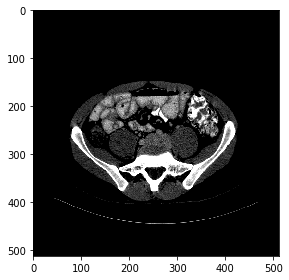

In [29]:
patient = load_images(data_path)
print(patient)
print(patient[0])

imshow(data_path + patient[0])
plt.show()

In [30]:
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

TRAIN_PATH = 'drive/My Drive/p_data/train/'
TEST_PATH = 'drive/My Drive/p_data/test/'

# for root, dirs, files in os.walk(TRAIN_PATH):
#   print(root)
#   print(dirs)
#   print(files)


train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

# try:
# except StopIteration:
#   pass

print(train_ids)
print(len(train_ids))

X_Train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_Train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print("Loading training images and masks")

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    print(path)
    img = cv2.imread(path + "/images/" + id_ + ".png", 1)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = "constant", preserve_range=True)
    X_Train[n] = img

    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path+ "/masks/"))[2]:
        mask_ = imread(path + "/masks/" + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH)), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_Train[n] = mask

##For test images

X_Test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_tests = []

print("Loading Test Images")

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = cv2.imread(path + "/images/" + id_ + ".png", 1)
    sizes_tests.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode="constant", preserve_range=True)
    X_Test[n] = img
print("Done")

print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)

  0%|          | 0/39 [00:00<?, ?it/s]

['000129', '000143', '000141', '000116', '000134', '000150', '000108', '000140', '000109', '000102', '000112', '000103', '000125', '000113', '000105', '000148', '000149', '000130', '000100', '000137', '000104', '000126', '000119', '000124', '000118', '000145', '000110', '000123', '000131', '000101', '000111', '000114', '000132', '000146', '000117', '000115', '000127', '000135', '000144']
39
Loading training images and masks
drive/My Drive/p_data/train/000129


  3%|▎         | 1/39 [00:00<00:31,  1.19it/s]

drive/My Drive/p_data/train/000143


  5%|▌         | 2/39 [00:01<00:30,  1.23it/s]

drive/My Drive/p_data/train/000141


  8%|▊         | 3/39 [00:02<00:29,  1.22it/s]

drive/My Drive/p_data/train/000116


 10%|█         | 4/39 [00:03<00:27,  1.29it/s]

drive/My Drive/p_data/train/000134


 13%|█▎        | 5/39 [00:03<00:26,  1.27it/s]

drive/My Drive/p_data/train/000150


 15%|█▌        | 6/39 [00:04<00:24,  1.35it/s]

drive/My Drive/p_data/train/000108


 18%|█▊        | 7/39 [00:05<00:23,  1.37it/s]

drive/My Drive/p_data/train/000140


 21%|██        | 8/39 [00:06<00:22,  1.36it/s]

drive/My Drive/p_data/train/000109


 23%|██▎       | 9/39 [00:06<00:22,  1.31it/s]

drive/My Drive/p_data/train/000102


 26%|██▌       | 10/39 [00:07<00:23,  1.25it/s]

drive/My Drive/p_data/train/000112


 28%|██▊       | 11/39 [00:08<00:22,  1.25it/s]

drive/My Drive/p_data/train/000103


 31%|███       | 12/39 [00:09<00:20,  1.32it/s]

drive/My Drive/p_data/train/000125


 33%|███▎      | 13/39 [00:09<00:19,  1.35it/s]

drive/My Drive/p_data/train/000113


 36%|███▌      | 14/39 [00:10<00:17,  1.41it/s]

drive/My Drive/p_data/train/000105


 38%|███▊      | 15/39 [00:11<00:18,  1.31it/s]

drive/My Drive/p_data/train/000148


 41%|████      | 16/39 [00:12<00:17,  1.30it/s]

drive/My Drive/p_data/train/000149


 44%|████▎     | 17/39 [00:12<00:16,  1.33it/s]

drive/My Drive/p_data/train/000130


 46%|████▌     | 18/39 [00:13<00:15,  1.35it/s]

drive/My Drive/p_data/train/000100


 49%|████▊     | 19/39 [00:14<00:12,  1.57it/s]

drive/My Drive/p_data/train/000137


 51%|█████▏    | 20/39 [00:14<00:12,  1.56it/s]

drive/My Drive/p_data/train/000104


 54%|█████▍    | 21/39 [00:15<00:12,  1.48it/s]

drive/My Drive/p_data/train/000126


 56%|█████▋    | 22/39 [00:16<00:11,  1.45it/s]

drive/My Drive/p_data/train/000119


 59%|█████▉    | 23/39 [00:16<00:11,  1.38it/s]

drive/My Drive/p_data/train/000124


 62%|██████▏   | 24/39 [00:17<00:10,  1.45it/s]

drive/My Drive/p_data/train/000118


 64%|██████▍   | 25/39 [00:18<00:11,  1.24it/s]

drive/My Drive/p_data/train/000145


 67%|██████▋   | 26/39 [00:19<00:10,  1.21it/s]

drive/My Drive/p_data/train/000110


 69%|██████▉   | 27/39 [00:20<00:11,  1.08it/s]

drive/My Drive/p_data/train/000123


 72%|███████▏  | 28/39 [00:21<00:09,  1.16it/s]

drive/My Drive/p_data/train/000131


 74%|███████▍  | 29/39 [00:22<00:08,  1.23it/s]

drive/My Drive/p_data/train/000101


 77%|███████▋  | 30/39 [00:22<00:07,  1.25it/s]

drive/My Drive/p_data/train/000111


 79%|███████▉  | 31/39 [00:23<00:06,  1.32it/s]

drive/My Drive/p_data/train/000114


 82%|████████▏ | 32/39 [00:24<00:05,  1.36it/s]

drive/My Drive/p_data/train/000132


 85%|████████▍ | 33/39 [00:24<00:04,  1.42it/s]

drive/My Drive/p_data/train/000146


 87%|████████▋ | 34/39 [00:25<00:03,  1.41it/s]

drive/My Drive/p_data/train/000117


 90%|████████▉ | 35/39 [00:26<00:02,  1.37it/s]

drive/My Drive/p_data/train/000115


 92%|█████████▏| 36/39 [00:27<00:02,  1.39it/s]

drive/My Drive/p_data/train/000127


 95%|█████████▍| 37/39 [00:27<00:01,  1.43it/s]

drive/My Drive/p_data/train/000135


 97%|█████████▋| 38/39 [00:28<00:00,  1.47it/s]

drive/My Drive/p_data/train/000144


  0%|          | 0/17 [00:00<?, ?it/s]

Loading Test Images


100%|██████████| 17/17 [00:07<00:00,  2.26it/s]

Done
(39, 512, 512, 3)
(39, 512, 512, 1)
(17, 512, 512, 3)


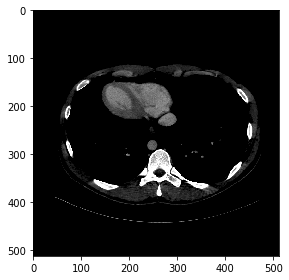

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


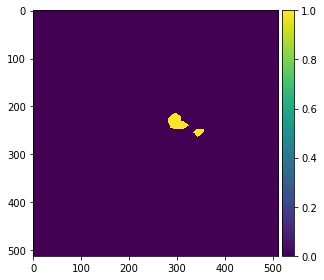

In [31]:
image_x = random.randint(0, len(train_ids))
imshow(X_Train[image_x])
plt.show()
imshow(np.squeeze(Y_Train[image_x]))
plt.show()

In [32]:
#Model UNET
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
# inputs = inputs.reshape((-1, 128, 128, 3))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction Path   
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)


c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

#Expansion path

u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)




outputs  = tf.keras.layers.Conv2D(1, (1,1), activation="sigmoid")(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

#Model Checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint("model_prostate.h5", verbose=1, save_best_only=True)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss")]

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 512, 512, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 512, 512, 16) 448         lambda_3[0][0]                   
__________________________________________________________________________________________________
dropout_27 (Dropout)            (None, 512, 512, 16) 0           conv2d_57[0][0]                  
____________________________________________________________________________________________

In [55]:
results = model.fit(X_Train, Y_Train, validation_split=0.1, batch_size=2, epochs=5)

idx = random.randint(0, len(X_Train))

preds_train = model.predict(X_Train[:int(X_Train.shape[0]*0.999999999)], verbose = 1)
preds_val = model.predict(X_Train[int(X_Train.shape[0]*0.999999999):], verbose = 1)
# preds_test = model.predict(X_Test, verbose = 1)

preds_train_t = (preds_train > 0.455).astype(np.uint8)
preds_val_t = (preds_val > 0.455).astype(np.uint8)
# preds_test_t = (preds_test > 0.35).astype(np.uint8)

Epoch 1/5
18/18 [==============================] - 1s 44ms/step - loss: 0.0099 - accuracy: 0.9936 - val_loss: 0.0430 - val_accuracy: 0.9908
Epoch 2/5
18/18 [==============================] - 1s 44ms/step - loss: 0.0095 - accuracy: 0.9936 - val_loss: 0.0479 - val_accuracy: 0.9908
Epoch 3/5
18/18 [==============================] - 1s 44ms/step - loss: 0.0097 - accuracy: 0.9936 - val_loss: 0.0269 - val_accuracy: 0.9908
Epoch 4/5
18/18 [==============================] - 1s 44ms/step - loss: 0.0096 - accuracy: 0.9936 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 5/5
1/1 [==============================] - 0s 8ms/step


24
Original


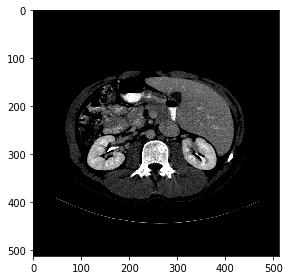

Truth


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


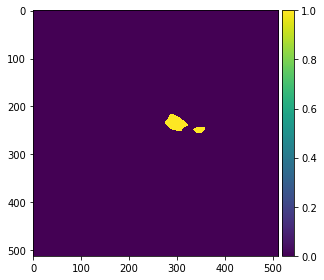

Predicted


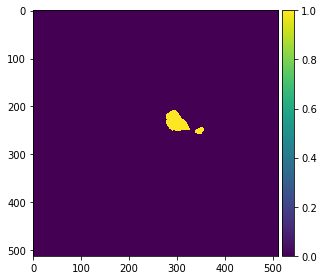

In [56]:
##Perform check

ix = random.randint(0, len(preds_train_t))
print(ix)

print("Original")
imshow(X_Train[10])
plt.show()
print("Truth")
imshow(np.squeeze(Y_Train[10]))
plt.show()
print("Predicted")
imshow(np.squeeze(preds_train_t[10]))
plt.show()